# NHTS Vehicle Type EDA

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
vehicles = pd.read_csv("vehpub_2017.csv")
households = pd.read_csv("hhpub_2017.csv")
trips = pd.read_csv("trippub_2017.csv")
pd.set_option('display.max_columns', None)

In [ ]:
trips_df = trips[trips['TRPHHVEH'] == 1].groupby(['HOUSEID', 'VEHID']).sum().reset_index()[['HOUSEID', 'VEHID', 'TRVLCMIN', 'TRPMILES']]
trips_df.head(5)

In [ ]:
vehicles_df = vehicles.merge(households[['HOUSEID', 'CNTTDHH', 'CAR', 'PRICE', 'PLACE']], on='HOUSEID', how='left')
vehicles_df = vehicles_df.merge(trips_df, on=['HOUSEID', 'VEHID'], how='left')
vehicles_df.head(5)

In [ ]:
vehicles_df['VEHTYPE'] = vehicles_df['VEHTYPE'].replace(5, 4)
vehicles_df['FUELTYPE'] = vehicles_df['FUELTYPE'].replace(6, 4)
vehicles_df = vehicles_df[(vehicles_df['VEHTYPE'] > 0)
                    & (vehicles_df['VEHTYPE'] != 6)
                    & (vehicles_df['VEHTYPE'] != 97)
                    & (vehicles_df['FUELTYPE'] > 0)
                    & (vehicles_df['FUELTYPE'] != 97)
                    & (vehicles_df['VEHAGE'] > 0)
                    & (vehicles_df['HTPPOPDN'] != -9)]
vehicles_df.loc[vehicles_df['VEHTYPE'] == 1, 'VEHTYPE'] = "Automobile"
vehicles_df.loc[vehicles_df['VEHTYPE'] == 2, 'VEHTYPE'] = "Van"
vehicles_df.loc[vehicles_df['VEHTYPE'] == 3, 'VEHTYPE'] = "SUV"
vehicles_df.loc[vehicles_df['VEHTYPE'] == 4, 'VEHTYPE'] = "Truck"
vehicles_df.loc[vehicles_df['VEHTYPE'] == 7, 'VEHTYPE'] = "Motorcycle"
vehicles_df.loc[vehicles_df['FUELTYPE'] == 1, 'FUELTYPE'] = "Gas"
vehicles_df.loc[vehicles_df['FUELTYPE'] == 2, 'FUELTYPE'] = "Diesel"
vehicles_df.loc[vehicles_df['FUELTYPE'] == 3, 'FUELTYPE'] = "Hybrid"
vehicles_df.head(5)

In [20]:
pd.set_option('display.max_columns', 10)

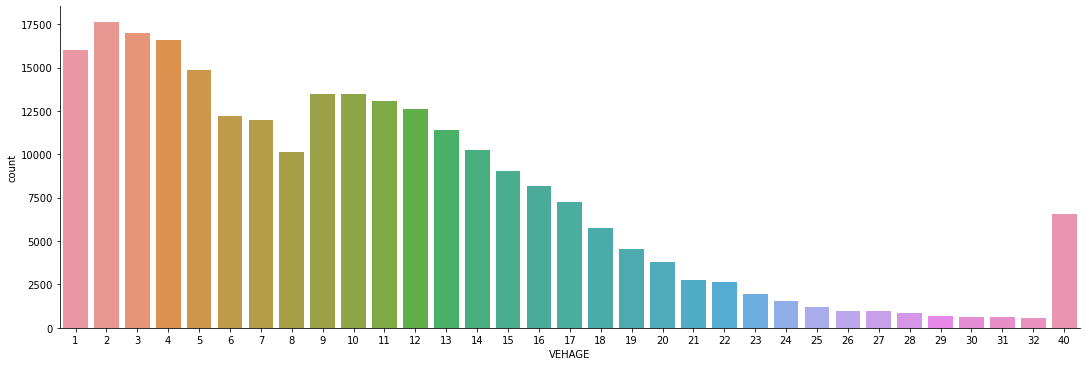

In [21]:
sns.catplot(data=vehicles_df[vehicles_df['VEHAGE'] >= 0], kind='count', x='VEHAGE', aspect=3)

Pretty steady increase in vehicle data year by year with a couple of exceptions. There seems to be a big gap between 1977 and 1985, with an unusually high amount of cars registered in 1977. Vehicle ownership seems to have gone down in 2009 post financial crisis as well.

<AxesSubplot:xlabel='HTPPOPDN,HTPPOPDN'>

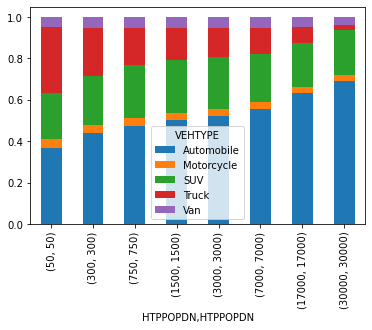

In [22]:
temp = vehicles_df.groupby(["HTPPOPDN", "VEHTYPE"]).count()["HOUSEID"]
temp.groupby("HTPPOPDN").apply(lambda x: x / float(x.sum())).unstack().plot.bar(stacked = True)

<AxesSubplot:xlabel='MSACAT,MSACAT'>

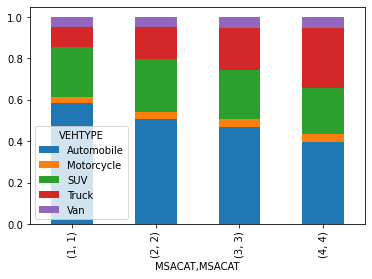

In [23]:
temp = vehicles_df.groupby(["MSACAT", "VEHTYPE"]).count()["HOUSEID"]
temp.groupby("MSACAT").apply(lambda x: x / float(x.sum())).unstack().plot.bar(stacked = True)

<AxesSubplot:xlabel='MSASIZE,MSASIZE'>

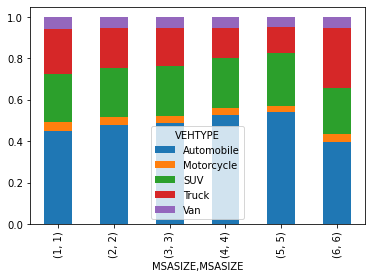

In [24]:
temp = vehicles_df.groupby(["MSASIZE", "VEHTYPE"]).count()["HOUSEID"]
temp.groupby("MSASIZE").apply(lambda x: x / float(x.sum())).unstack().plot.bar(stacked = True)

<AxesSubplot:xlabel='NUMADLT,NUMADLT'>

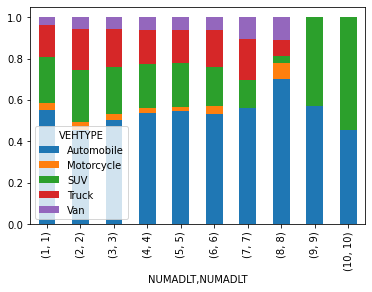

In [25]:
temp = vehicles_df.groupby(["NUMADLT", "VEHTYPE"]).count()["HOUSEID"]
temp.groupby("NUMADLT").apply(lambda x: x / float(x.sum())).unstack().plot.bar(stacked = True)

<AxesSubplot:xlabel='HHVEHCNT,HHVEHCNT'>

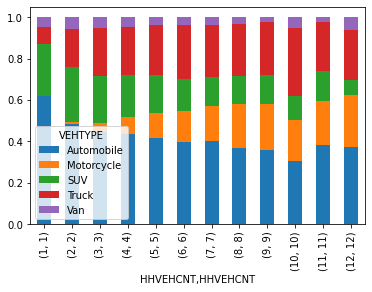

In [26]:
temp = vehicles_df.groupby(["HHVEHCNT", "VEHTYPE"]).count()["HOUSEID"]
temp.groupby("HHVEHCNT").apply(lambda x: x / float(x.sum())).unstack().plot.bar(stacked = True)

<AxesSubplot:xlabel='HHFAMINC,HHFAMINC'>

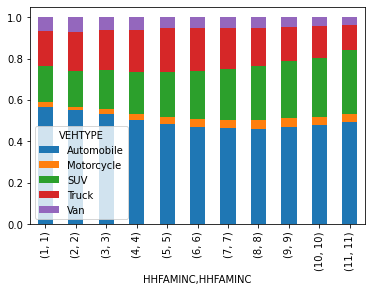

In [27]:
temp = vehicles_df.groupby(["HHFAMINC", "VEHTYPE"]).count()["HOUSEID"].drop([-9, -8, -7])
temp.groupby("HHFAMINC").apply(lambda x: x / float(x.sum())).unstack().plot.bar(stacked = True)

<AxesSubplot:xlabel='HBHUR,HBHUR'>

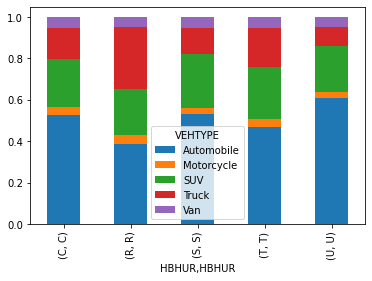

In [28]:
temp = vehicles_df.groupby(["HBHUR", "VEHTYPE"]).count()["HOUSEID"]
temp.groupby("HBHUR").apply(lambda x: x / float(x.sum())).unstack().plot.bar(stacked = True)

<AxesSubplot:xlabel='LIF_CYC,LIF_CYC'>

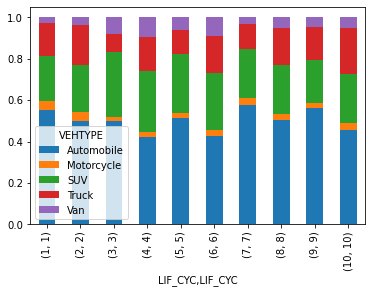

In [29]:
temp = vehicles_df.groupby(["LIF_CYC", "VEHTYPE"]).count()["HOUSEID"].drop(-9)
temp.groupby("LIF_CYC").apply(lambda x: x / float(x.sum())).unstack().plot.bar(stacked = True)

<AxesSubplot:xlabel='CDIVMSAR,CDIVMSAR'>

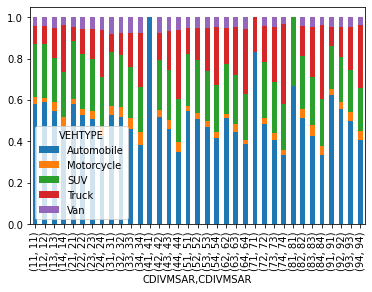

In [30]:
temp = vehicles_df.groupby(["CDIVMSAR", "VEHTYPE"]).count()["HOUSEID"]
temp.groupby("CDIVMSAR").apply(lambda x: x / float(x.sum())).unstack().plot.bar(stacked = True)

<AxesSubplot:xlabel='CENSUS_D,CENSUS_D'>

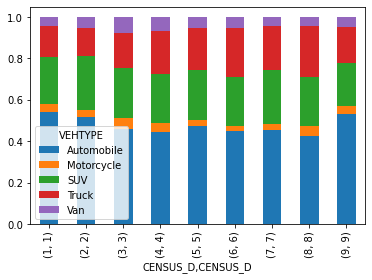

In [32]:
temp = vehicles_df.groupby(["CENSUS_D", "VEHTYPE"]).count()["HOUSEID"]
temp.groupby("CENSUS_D").apply(lambda x: x / float(x.sum())).unstack().plot.bar(stacked = True)

<AxesSubplot:xlabel='CENSUS_R,CENSUS_R'>

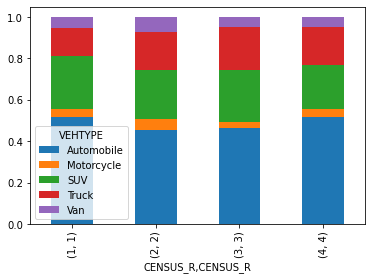

In [33]:
temp = vehicles_df.groupby(["CENSUS_R", "VEHTYPE"]).count()["HOUSEID"]
temp.groupby("CENSUS_R").apply(lambda x: x / float(x.sum())).unstack().plot.bar(stacked = True)

<AxesSubplot:xlabel='CNTTDHH,CNTTDHH'>

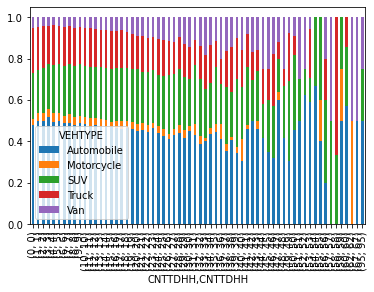

In [34]:
temp = vehicles_df.groupby(["CNTTDHH", "VEHTYPE"]).count()["HOUSEID"]
temp.groupby("CNTTDHH").apply(lambda x: x / float(x.sum())).unstack().plot.bar(stacked = True)

In [41]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=vehicles, x='VEHTYPE', y='TRVLCMIN', palette='deep')

ValueError: Could not interpret value `TRVLCMIN` for parameter `y`

<Figure size 864x504 with 0 Axes>

In [ ]:
nums = np.arange(1, 11).tolist()
df = vehicles[vehicles['LIF_CYC'].isin(nums)]
df['LIF_CYC'] = df['LIF_CYC'].replace({1: '1 Adult, 0 Child',
                2: '2+ Adult, 0 Child',
                3: '1 Adult, Youngest 0-5',
                4: '2+ Adult, Youngest 0-5',
                5: '1 Adult, Youngest 6-15',
                6: '2+ Adult, Youngest 6-15',
                7: '1 Adult, Youngest 16-21',
                8: '2+ Adult, Youngest 16-21',
                9: '1 Adult Retired, 0 Child',
                10: '2+ Adult Retired, 0 Child'})
sns.catplot(data=df, kind='count', x='LIF_CYC', aspect=4)

LIF_CYC - Life Cycle classification for the household, derived by attributes pertaining to age, relationship, and work status.

In [ ]:
nums = [-9]
df = vehicles[~vehicles['HTRESDN'].isin(nums)]
sns.catplot(data=df, kind='count', x='HTRESDN', aspect=2)

HTRESDN - Category of housing units per square mile in the census tract of the household's home location <br>
50=0-99 <br>
300=100-499 <br>
750=500-999 <br>
1500=1,000-1,999 <br>
3000=2,000-3,999 <br>
7000=4,000-9,999 <br>
17000=10,000-24,999 <br>
30000=25,000-999,999

In [ ]:
nums = [-9]
df = vehicles[~vehicles['HTEEMPDN'].isin(nums)]
sns.catplot(data=df, kind='count', x='HTEEMPDN', aspect=2)

HTEEMPDN - Category of workers per square mile in the census tract of the household's home location <br>
25=0-49 <br>
75=50-99 <br>
150=100-249 <br>
350=250-499 <br>
750=500-999 <br>
1500=1,000-1,999 <br>
3000=2,000-3,999 <br>
5000=4,000-999,999

In [ ]:
nums = [-9]
df = vehicles[~vehicles['HTPPOPDN'].isin(nums)]
sns.catplot(data=df, kind='count', x='HTPPOPDN', aspect=2)

HTPPOPDN - Category of population density (persons per square mile) in the census tract of the household's home location <br>
50=0-99 <br>
300=100-499 <br>
750=500-999 <br>
1500=1,000-1,999 <br>
3000=2,000-3,999 <br>
7000=4,000-9,999 <br>
17000=10,000-24,999 <br>
30000=25,000-999,999

In [ ]:
nums = [-9, -8, -7]
df = vehicles[~vehicles['HHFAMINC'].isin(nums)]
sns.catplot(data=df, kind='count', x='HHFAMINC', aspect=2)

HHFAMINC - Household income
01=Less than \\$10,000 <br>
02=\\$10,000 to \\$14,999 <br>
03=\\$15,000 to \\$24,999 <br>
04=\\$25,000 to \\$34,999 <br>
05=\\$35,000 to \\$49,999 <br>
06=\\$50,000 to \\$74,999 <br>
07=\\$75,000 to \\$99,999 <br>
08=\\$100,000 to \\$124,999 <br>
09=\\$125,000 to \\$149,999 <br>
10=\\$150,000 to \\$199,999 <br>
11=\\$200,000 or more

In [ ]:
nums = [-9, -8, -7]
df = vehicles[~vehicles['HHSIZE'].isin(nums)]
sns.catplot(data=df, kind='count', x='HHSIZE', aspect=2)

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=vehicles, x='VEHTYPE', y='CNTTDHH')

BESTMILE - Best estimate of annual miles.

In [ ]:
hbhur = ['Town', 'Rural', 'Second City', 'Suburban', 'Urban']
vehicles['HBHUR'] = vehicles['HBHUR'].replace({'T': 'Town',
                                               'R': 'Rural',
                                               'C': 'Second City',
                                               'S': 'Suburban',
                                               'U': 'Urban'})
plt.figure(figsize=(12,7))
sns.scatterplot(data=vehicles[vehicles['HBHUR'].isin(hbhur)], x='HBHUR', y='GSYRGAL').set_title('Annual Gas Consumption by Area Classification')

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=vehicles[(vehicles['VEHYEAR'] >= 0) & (vehicles['FUELTYPE'].isin(fuel_types))], x='VEHYEAR', y='FEGEMPG', hue='FUELTYPE', palette='deep').set_title('Fuel Economy by Vehicle Year & Fuel Type')

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=vehicles[(vehicles['OD_READ'] >= 0) & (vehicles['FUELTYPE'].isin(fuel_types))], x='OD_READ', y='FEGEMPG', hue='FUELTYPE', palette="deep").set_title('Fuel Economy by Odomoter Reading & Fuel Type')

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=vehicles[(vehicles['VEHYEAR'] >= 0) & (vehicles['FUELTYPE'].isin(fuel_types))], x='VEHYEAR', y='GSTOTCST', hue='FUELTYPE', palette="deep").set_title('Annual Fuel Cost by Vehicle Year & Fuel Type')

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=vehicles, x='HTRESDN', y='HTPPOPDN', hue='VEHTYPE', palette="deep")